In [2]:
 pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-wlglwt3e
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-wlglwt3e
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.8 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=11ec0891499a030bf9c4470fcb56488a4bdbe29e309ad4ff734a3d53d35d9109
  Stored in directory: /tmp/pip-ephem-wheel-cache-lxuikotk/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip


In [3]:
import torch
import clip
from torchvision.datasets import CIFAR10
from torchvision import transforms
import matplotlib.pyplot as plt

In [4]:
print(dir(clip))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'available_models', 'clip', 'load', 'model', 'simple_tokenizer', 'tokenize']


In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [6]:
# Load CLIP model
model, preprocess = clip.load("ViT-B/32", device=device)

100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 115MiB/s]


In [7]:
dataset = CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=preprocess
)

100%|██████████| 170M/170M [00:03<00:00, 47.1MB/s]


In [8]:
class_names = dataset.classes

In [9]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [10]:
# Prepare text inputs (text modality)
text_inputs = torch.cat([
    clip.tokenize(f"a photo of a {c}") for c in class_names
]).to(device)

In [11]:
# Get one image
image, label = dataset[10]
image_input = image.unsqueeze(0).to(device)

In [12]:
# Encode image and text
with torch.no_grad():
    image_features = model.encode_image(image_input)
    text_features = model.encode_text(text_inputs)

    # Compute similarity
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)

In [13]:
# Prediction
values, indices = similarity[0].topk(3)

In [14]:
print("Top predictions:")
for value, index in zip(values, indices):
    print(f"{class_names[index]}: {value.item():.4f}")

Top predictions:
airplane: 1.0000
bird: 0.0000
automobile: 0.0000


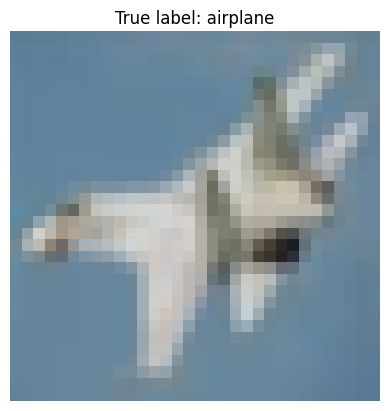

In [15]:
# Show image
plt.imshow(dataset.data[10])
plt.axis("off")
plt.title(f"True label: {class_names[label]}")
plt.show()